<a href="https://colab.research.google.com/github/badstyle-goodstyle/data_engineering/blob/data_engine/data_engine_practice6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ссылка: https://archive.ics.uci.edu/ml/datasets/magic+gamma+telescope
Информация о наборе данных:

Данные генерируются MC (см. ниже) для имитации регистрации гамма-частиц высоких энергий в наземном атмосферном черенковском гамма-телескопе с использованием метода визуализации. Черенковский гамма-телескоп наблюдает гамма-лучи высокой энергии, используя излучение, испускаемое заряженными частицами, образующимися внутри электромагнитных ливней, инициированных гамма-излучением и развивающихся в атмосфере. Это черенковское излучение (длины волн от видимого до УФ) просачивается через атмосферу и регистрируется в детекторе, что позволяет реконструировать параметры ливня. Имеющаяся информация состоит из импульсов, оставленных падающими черенковскими фотонами на фотоумножители, расположенные в плоскости камеры. В зависимости от энергии первичного гамма-излучения в общей сложности собирается от нескольких сотен до 10 000 черенковских фотонов в паттернах (называемых изображением ливня), что позволяет статистически отличать фото, вызванное первичным гамма-излучением (сигналом), от изображений инициированных адронных ливней. космическими лучами в верхних слоях атмосферы (фон).

Если проще: в зависимости от характеристик определяется тип частицы (gamma или hadron), вызвавшей радиацию. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

Датасет для тренировки модели.

In [15]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("drive/MyDrive/data_engineering/magic04.data", names=cols)
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


Классификация модели (для представления данных).

In [16]:
df["class"] = (df["class"] == "g").astype(int)
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


density=True - нормализует распределения по каждой из представленных характеристик. Важно для классификации.

Визуализация каждой группы данных.

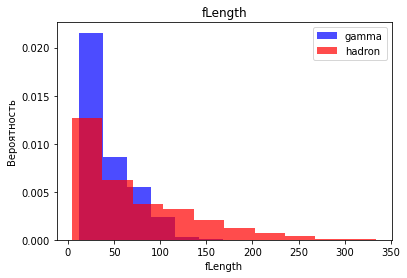

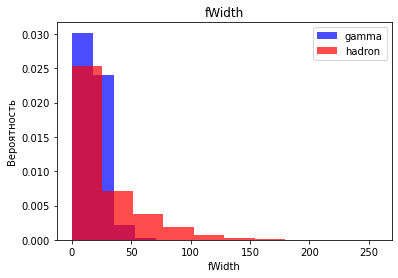

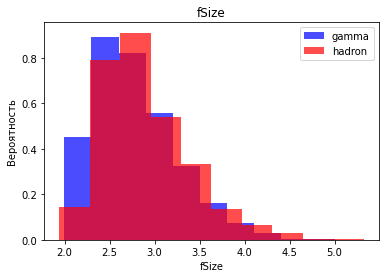

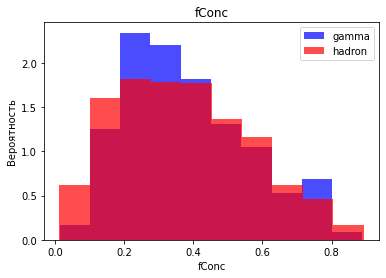

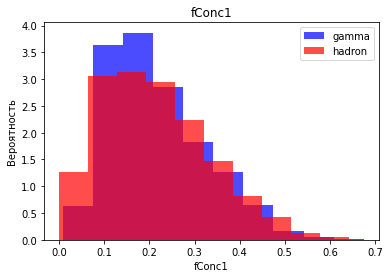

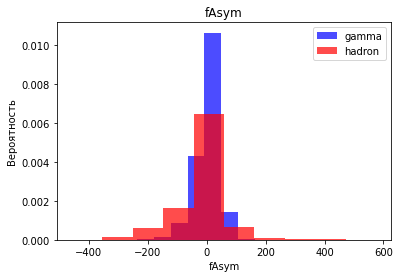

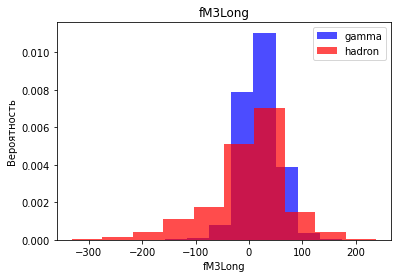

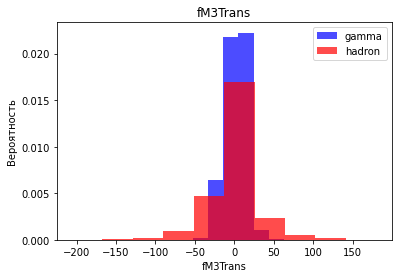

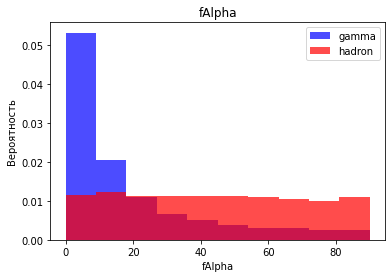

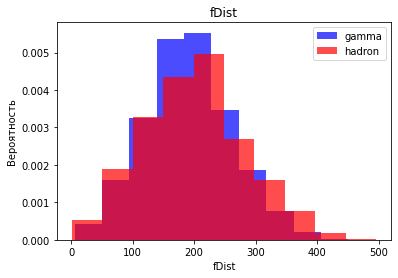

In [18]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Вероятность")
  plt.xlabel(label)
  plt.legend()
  plt.show()

Train, validation, test datasets:
Тренировочный, валидационный (предварительная оценка потерь) и тестовый (конечная оценка потерь) датасеты

Распределение данных для представленных значений:
от 0% до 60% - тренировочные данные
от 60% до 80% - валидационные данные
от 80% до 100% - тестовые данные

In [25]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

Функция для масштабирования данных (чтобы каждая характеристика была в диапозоне от -1 до 1)

In [34]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  # превращаю y в массив через np.reshape и группирую в один стэк
  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

oversample == увеличение количества данных для удобства сравнения (при обучении значимо)

In [27]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

Теперь кол-во тестовых экземпляров (gamma и hadron) одинаково

In [44]:
print(sum(y_train==1))
print(sum(y_train==0))

7438
7438


In [45]:
train

array([[-0.33955894,  0.22985178,  0.78485091, ..., -0.84244611,
        -1.10250092,  0.        ],
       [ 0.43827115,  0.16617202,  1.47100547, ..., -1.00243872,
         0.84249449,  1.        ],
       [-0.82084389, -0.6452548 , -0.98150028, ..., -0.70376603,
        -0.14493479,  1.        ],
       ...,
       [ 0.63962714,  0.23345989,  0.96563159, ...,  0.29056146,
         1.29995625,  0.        ],
       [-0.53758505, -0.68663041, -0.26607035, ...,  1.96436537,
         0.59043677,  0.        ],
       [-0.10901775, -0.65944633,  0.00232271, ...,  1.67305034,
         0.58160176,  0.        ]])

In [46]:
valid

array([[-0.19409582, -0.3534714 , -0.19486696, ..., -0.74082319,
        -0.30362019,  1.        ],
       [ 0.29258903,  0.11809045,  0.46547968, ..., -0.76539336,
         0.39735111,  1.        ],
       [ 1.06289762,  0.13446258,  0.81399596, ...,  0.490895  ,
         1.49783047,  0.        ],
       ...,
       [-0.59507395, -0.0853364 , -0.48230951, ...,  0.64574729,
         0.45285816,  0.        ],
       [ 0.84238996,  0.79489826,  2.51051151, ..., -0.98389858,
         1.12635641,  1.        ],
       [ 1.77255016,  1.27699243,  1.35261203, ...,  1.15152411,
        -1.46495585,  0.        ]])

In [47]:
test

array([[-0.37874842, -0.15449613,  0.06775139, ..., -0.54148671,
        -1.06062625,  1.        ],
       [ 0.06207444, -0.29004042,  0.27513217, ..., -0.82064336,
         1.29520574,  1.        ],
       [ 0.79420187,  0.4035892 ,  2.14009734, ..., -0.99835439,
         0.89692549,  1.        ],
       ...,
       [-0.47621272, -0.21256675, -0.30816544, ..., -0.69996162,
        -0.3708364 ,  1.        ],
       [-0.4691096 , -0.42302215, -0.18620132, ..., -0.57641849,
        -1.13236299,  1.        ],
       [ 0.51705016, -0.17659493,  0.07067519, ..., -0.48173338,
         0.7962114 ,  0.        ]])

- Мы распределили исходный набор данных в 3 ряда (важно для моделирования и проверки модели на неизвестных данных).

# kNN - алгоритм (k ближайших соседей)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [31]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
y_pred = knn_model.predict(X_test)

In [48]:
y_pred

array([1, 0, 1, ..., 1, 1, 0])

In [50]:
y_test

array([1, 1, 1, ..., 1, 1, 0])

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74      1367
           1       0.85      0.87      0.86      2437

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



precision == отношение всех помеченных тестовых верных данных к числу действительно верных данных
<br>
accuracy == отношение "позитивно" отмеченных тестовых данных к действительному числу "позитивных" данных.
